# 1.INTRODUCTION
Tera pixel images provide stakeholders with a convenient method of presenting information sets, enabling users to interactively navigate big data at various scales. The main challenge is how to achieve the supercomputer scale resources needed to create a genuine terapixel visualisation of Newcastle upon Tyne and its environmental data as collected by the Newcastle urban observatory.
The main objective of the report is to conduct a performance analysis of Terapixel rendering on a cloud-based supercomputer which process intensive visualisation application using TeraScope data set.
It is feasible to produce a high-quality terapixel visualisation by the path tracing renderer using public IaaS cloud GPU nodes. The Tera pixel image support interactive browsing of the city and data can be accessed across a wide range of team client devices.
TeraScope data set is generated from application checkpoints and system metric output from the production of terraced pixel images. With the help of these data, performance evaluation can be carried out using exploratory Data analysis by focusing on the below main areas.
1.  Time consumed for each event type.
2.  Anlysis based on hostname,taskId regarding the GPU resources and the properties.
3.  study showing how the GPU properties and time taken for rendering related to each tiles or task id.
In this report, these areas will be analysed critically, and the information obtained is interpreted to generate useful insights from the data.
CRISP-DM methodology is followed for exploratory analysis and answering the main questions.

# 2.METHODOLOGY (CRISP-DM)
## BUSINESS UNDERSTANDING
The purpose of analyzing the data is to help stakeholders make the appropriate judgment for smooth and effective visualisation of Newcastle city by optimizing computational resources.
The information derived from this raw data will help the technical teams (cloud engineers,architect etc) to design the system there by satisfying the requirement of business.
The following questions will help to genarate sensible conclusion from the data through exploratory analysis.  
1. Which task Id took the highest time as well as lowest time for Total rendering, Rendering, tiling, uploading and saving config processes and their corresponding rendered image coordinates?   
2. Which Event Name consumes more run time?  
3. Is there any relationship between the variables in the GPU table? If so, how are they related?
4. Can any particular statistical model be fitted to any variables related to GPU performance matrix? If so, describe the model.
5. What are the host names which consumed maximum and minimum time for the rendering process?
6. What are the maximum and minimum values of computational resource used, temperature and power consumption of the GPU and identify the corresponding virtual machines (hostname)?  
7. Which virtual machine processed most image rendering tasks? explain this with the help of a histogram.  
8. How many image coordinates are associated with each level?
9. How are the tiles of the image and total rendering times related?
10. Explain the GPU properties using suitable graphs on the basis of hostnames and Task Id?
11. How are the GPU properties related to the tile properties of the rendered image?



## DATA UNDERSTANDING
The provided data shows the performance timing of the render applications as well the performance of the GPU card, conveying the details of which part of the image rendering in each task while performing a run using 1024 GPU nodes. 
1.	Application-checkpoints  
  
|Field Names | Data Types(changed) |Description |Example| 
|-------|:-----|:-----| :----|
|Timestamp|Timestamp |Shows the time for a particular event |2018-11-08T07:42:29.845ZZ|
|hostname|String|Host name of the virtual machine|0d56a730076643d585f77e00d2d8521a00000N
|eventName|String|Name of the event occurring within the rendering application|Render
|eventType|String|indicate whether the process starts or stops|START
|jobId|String|ID of the Azure Batch job|1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705
|taskId|String|ID of the Azure Batch task|0002afb5-d05e-4da9-bd53-7b6dc19ea6d4  



*   Under each taskId there are five processes namely saving config, Render, Tiling and uploading. Total render denotes the sum total of all this process. In conclusion, the data set shows the start time and stop time of each process for a particular taskId , hostName and Job id.
*  Primary keys for this table are taskId, eventname and eventType 


*   Foreign keys are taskId and Hostname.       
 




2.	GPU

|Field Names | Data Types(changed) |Description |Example| 
|-------|:-----|:-----| :----|
|Timestamp|Timestamp|Recoded Time|2018-11-08T08:27:10.424Z
|hostname|String|Host name of the virtual machine |db871cd77a544e13bc791a64a0c8ed50000003
|gpuSerial|String|The serial number of the physical GPU card|323217056464
|gpuUUID|String|The unique system Id assigned by the Azure system to the GPU unit|GPU-2d4eed64-4ca8-f12c-24bc-28f036493ea2
|powerDrawWatt|Number|Power draw of the GPU in watts|24.5
|gpuTempC|Number|Temparature of the GPU in celcius|44
|gpuUtilPerc|Number (%)|Percentage utilization of the GPU memory|88
|gpuMemUtilPerc|Number (%)|Percentage utilization of the GPU cores|43



*   The table mainly shows the quantity of system resources used by each hostname for a particular time. In addition, it also indicates the temperature and power utilization of the core for each time.

*   Primary key is gpuSrial/gpuUUID and the foreign key is the hostname.
*   	For each hostName, gpuSrial and gpuUUID are unique.



3.	Task-x-y


|Field Names | Data Types(changed) |Description |Example| 
|-------|:-----|:-----| :----|
|taskId|String|Id of the Azure Batch task|00004e77-304c-4fbd-88a1-1346ef947567
|jobId|String|Id of the Azure Batch job|1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705
|x|Number|Rendered image Y axis|116
|y|Number|Rendered image X axis|118
|level|Number|It represent the zooming level |12



*   	This table shows the x,y coordinate of the part of rendered image under each tasked
*   	Primary Keys is taskId and foreign keys are taskId and jobId


*   	There are three levels of image rendering based on the zoom feature they are 4,8 and 12. Each level falls under 3 separate job Id.



|Job Id| Level | 
|-------|:-----|
1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705|12
|1024-lvl4-90b0c947-dcfc-4eea-a1ee-efe843b698df|4
|1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63|8  
  

Overall, there are 3 distinct job Id, 1024 unique Host Name and 65793 distinct task Id.





In [ ]:
#importing necessary libraries and connecting to google cloud
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Before loading data make sure that the 3 Excel files are saved in google cloud. save the files under /content/gdrive/MyDrive/cloud_project/. Then load the data as following below.

In [ ]:
#locations of the csv files
application_checkpoint_location="/content/gdrive/MyDrive/cloud_project/application-checkpoints.csv"
gpu_location='/content/gdrive/MyDrive/cloud_project/gpu.csv'
task_x_y_location='/content/gdrive/MyDrive/cloud_project/task-x-y.csv'
#Loading data
application_checkpoint=pd.read_csv(application_checkpoint_location) #
gpu=pd.read_csv(gpu_location)
task_x_y=pd.read_csv(task_x_y_location)
# This data set is generated from this above two dataset using the query given in the subsequent section. since the query takes long time to execute , pulling the saved csv file reduce time 
#a_c_g_join=pd.read_csv('/content/gdrive/MyDrive/cloud_project/all_3_data.csv')

The sumary of the GPU table is given below

In [ ]:
#sumary of GPU table
gpu.describe()#running this code after duplicate removal yield better results

,gpuSerial,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
count,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06,1.543681e+06
mean,3.239836e+11,8.919838e+01,4.007560e+01,6.305820e+01,3.341359e+01
std,1.228841e+09,3.975742e+01,3.800243e+00,4.144816e+01,2.300107e+01
min,3.201181e+11,2.255000e+01,2.600000e+01,0.000000e+00,0.000000e+00
25%,3.236170e+11,4.499000e+01,3.800000e+01,0.000000e+00,0.000000e+00
50%,3.236170e+11,9.659000e+01,4.000000e+01,8.900000e+01,4.300000e+01
75%,3.250170e+11,1.213400e+02,4.200000e+01,9.200000e+01,5.100000e+01
max,3.252171e+11,1.970100e+02,5.500000e+01,1.000000e+02,8.300000e+01


## DATA PREPARATION

1.  New column is added to the Application-checkpoints table to indicate the time taken for each eventName. It is named “delta_dttm”.
2.  The original field name Timestamp is renamed to dttm to avoid confusion with the data type
3.  The field delta_dttm is converted to timestamp/float (seconds) depending on the requirement.
4.  There are 2470 duplicates in the Application-checkpoints table. They were removed before processing the data.
5.  There are also 9 duplicates in the GPU table. Here, the duplicates are eliminated using suitable queries.
6.  The same pre-processing steps for the Application-checkpoint table are used in GPU as well like renaming the column ‘Timestamp’ to ‘dttm’, and changing the data type to timestamp/float (seconds) based on the requirements.
7.  For the Task-x-y table there are no duplicates. So, renaming of the column was done.




In [ ]:
#installing dependencies and necessary libraries
!pip install -U pandasql
from pandasql import sqldf
import matplotlib.pyplot as plt
pysqldf = lambda q: sqldf(q, globals())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dup check found 2470 duplicates for application-checkpoint
q ="""select taskId,jobId,eventName,eventType,hostname from application_checkpoint group by 1,2,3,4,5 having count(*)>1;"""
dupe=pysqldf(q)
len(dupe)

2470

In [ ]:
# colunm name 'timestamp' changes to 'dttm'
application_checkpoint=application_checkpoint.rename(columns={"timestamp": "dttm"})

In [ ]:
#code for removing duplicates
q ="""select dttm,hostname,eventName,eventType,jobId,taskId,count(*) from application_checkpoint group by 1,2,3,4,5,6 having count(*)>1;"""
i=pysqldf(q)
q ="""select dttm,hostname,eventName,eventType,jobId,taskId,count(*) from application_checkpoint group by 1,2,3,4,5,6 having count(*)=1;"""
application_checkpoint=pd.concat([i.iloc[:,:6],pysqldf(q).iloc[:,:6]])



In [ ]:
#post dupe check
q ="""select dttm,hostname,eventName,eventType,jobId,taskId,count(*) from application_checkpoint group by 1,2,3,4,5,6 having count(*)>1;"""
dupe=pysqldf(q)
len(dupe)

0

In [ ]:
# data type changing
application_checkpoint["dttm"]=application_checkpoint["dttm"].astype('datetime64[ns]')
print(application_checkpoint.dtypes)

dttm         datetime64[ns]
hostname             object
eventName            object
eventType            object
jobId                object
taskId               object
dtype: object


In [ ]:
#renaming colunm-gpu table
gpu=gpu.rename(columns={"timestamp": "dttm"})

In [ ]:
#dup check and dupe removal starting
q ="""select dttm,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from gpu group by 1,2,3,4,5,6,7,8 having count(*)>1;"""
dupe=pysqldf(q)
len(dupe)


9

In [ ]:
#dupe  removal
q ="""select dttm,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from gpu group by 1,2,3,4,5,6,7,8 having count(*)=1;"""
gpu=pd.concat([dupe.iloc[:,:8],pysqldf(q).iloc[:,:8]])

In [ ]:
#post dupe check
q ="""select dttm,hostname,gpuSerial,gpuUUID,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc,count(*) from gpu group by 1,2,3,4,5,6,7,8 having count(*)>1;"""
dupe=pysqldf(q)
len(dupe)

0

In [ ]:
#data type changing
gpu["dttm"]=gpu["dttm"].astype('datetime64')
gpu.dtypes

dttm              datetime64[ns]
hostname                  object
gpuSerial                  int64
gpuUUID                   object
powerDrawWatt            float64
gpuTempC                   int64
gpuUtilPerc                int64
gpuMemUtilPerc             int64
dtype: object

## MODELLING 
Exploratory analysis is implemented on these data sets to generate useful information which could represent the performance evaluation of the process and system. In this report, as per the objectives, significant questions will be framed and they are answered with corresponding tables or figures.
For carrying out the analysis, Python programming language is used and since it is difficult to analyse the data using python framework, panda SQL module is installed for easy analysis using MySQL query language.
The script for the analysis is generated through google colab which offers a markdown feature to create a pdf containing the script as well as the text for efficient communication and for reproducibility.

### ASSUMPTIONS
1. Each event starts and stops consecutively which means there is no time gap between succeeding events. (In actual case there is a minute time gap)  
2. Only one task Id is executed at a single point in time of a virtual machine.
 In some hostname multiple events is executed in the same timeframe). So, it is difficult to find the GPU properties for a particular task Id.


### METHOD FOR REPRESENTING PERFORMANCE PARAMETER

To evaluate the performance of the virtual machine or GPU, the time taken for a particular activity by each unit is calculated. Then, the assumption is the performance is higher for the machines which take less time to complete the task.
The table _ can be used for finding the time taken for each evetime under each task id we can use the following method.


|dttm|eventName|eventType|taskId|dttm_delta|
|-------|:-----|--|-------|:-----|
|07:45:14|Render|START|000993b6-fc88-489d-a4ca-0a44fd800bd3|00:00:39
|07:45:53|Render|STOP|000993b6-fc88-489d-a4ca-0a44fd800bd3|
|07:45:14|Saving Config|START|000993b6-fc88-489d-a4ca-0a44fd800bd3|00:00:00
|07:45:14|Saving Config|STOP|000993b6-fc88-489d-a4ca-0a44fd800bd3|
|07:45:53|Tiling|START|000993b6-fc88-489d-a4ca-0a44fd800bd3|00:00:01
|07:45:54|Tiling|STOP|000993b6-fc88-489d-a4ca-0a44fd800bd3|
|07:45:14|TotalRender|START|000993b6-fc88-489d-a4ca-0a44fd800bd3|00:00:41
|07:45:55|TotalRender|STOP|000993b6-fc88-489d-a4ca-0a44fd800bd3|
|07:45:53|Uploading|START|000993b6-fc88-489d-a4ca-0a44fd800bd3|00:00:01
|07:45:54|Uploading|STOP|000993b6-fc88-489d-a4ca-0a44fd800bd3|

For example, in the above table, the time taken for the Render process is calculated by subtracting the time corresponding to the start event type from the stop event type that is: 
07:45:53-07:45:14 = 00:00:39
From the table, we can understand that the eventType saving config took less time compared to the other process and if we extend this method across different hostnames and compare the time taken for a particular task with similar complexities, the performance of the virtual machine can be analysed.

### TABLES JOINING
1.  The tables Application-checkpoints and GPU can be joined using the Hostname as a foreign key to analysing machine performance, GPU temperature, GPU power and system resources.
2.  The tables Application-checkpoints and Task-x-y can be joined using jobId and taskId which will help to explore the coordinate analysis and level-wise analysis.
3.  Application-checkpoint (a) and GPU (b) can be joined by hostname, and the timestamp of the GPU table should be in between the start timestamp and end timestamp of the Application-checkpoint table where  
 **start timestamp** column is obtained using even type as **START** for a  particular taskId and event name as **Total Render**. similarly, **end timestamp** column is obtained using even type as **STOP** for a  particular taskId and event name as **Total Render**
 The query condition is:
 (a.start timestamp ≤ b.timestamp ≤ a.end timestamp and a.hostname=b.hostname) . The result can be joined with the last table using taskId column.

The Questions we are going to answer through Data exploration, and the methods of finding the answer are explained in this session through suitable data visualisation.   
#### 1.   *Which task Id took the highest time as well as lowest time for Total rendering, Rendering, tiling, uploading and saving config processes and their corresponding rendered image coordinates?* 
 *Note the minimum time taken denote improved performance*


Top 5 TaskId which took most Time for 'saving configuration'

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Saving config" eventname from (select distinct dttm,taskId,jobId from application_checkpoint where eventName='Saving Config' and eventType='START') a join 
(select distinct dttm,taskId,jobId from application_checkpoint where eventName='Saving Config' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
q_1_1=pysqldf(q)
q_1_1["start_dttm"]=q_1_1["start_dttm"].astype('datetime64')
q_1_1["end_dttm"]=q_1_1["end_dttm"].astype('datetime64')
q_1_1['delta_dttm']=q_1_1['end_dttm']-q_1_1['start_dttm']
# arranging in descending order
q_1_1=q_1_1.sort_values(by='delta_dttm', ascending=False)
q_1_1.head()


,start_dttm,end_dttm,taskId,jobId,eventname,delta_dttm
46417,2018-11-08 08:15:09.191,2018-11-08 08:15:09.651,59ac7676-f371-4eee-aa67-5f7c7daf40dc,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0 days 00:00:00.460000
58351,2018-11-08 08:23:54.599,2018-11-08 08:23:54.954,3fd24b4f-8d7c-4903-b320-41366176cfab,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0 days 00:00:00.355000
4761,2018-11-08 07:44:45.666,2018-11-08 07:44:45.778,69e5e501-23c9-48a6-9b64-6c530413fe05,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0 days 00:00:00.112000
62064,2018-11-08 08:26:39.221,2018-11-08 08:26:39.315,ce558805-a34f-4d41-b74d-1a17524be6cd,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0 days 00:00:00.094000
37065,2018-11-08 08:08:18.892,2018-11-08 08:08:18.977,788a3433-6a1f-423e-b8c5-dc3369484e64,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0 days 00:00:00.085000


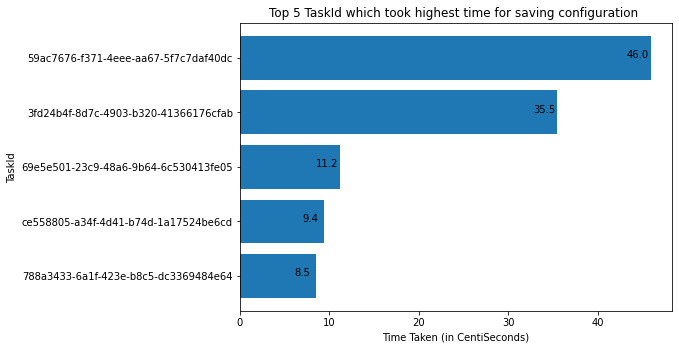

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =q_1_1.head()["taskId"]
students =q_1_1.head()["delta_dttm"].dt.microseconds/10000
ax.barh(langs,students)
plt.xlabel("Time Taken (in CentiSeconds)")
plt.ylabel("TaskId")
plt.title("Top 5 TaskId which took highest time for saving configuration ")
ax.invert_yaxis()
for i in range(1,6):
   plt.text(-1.5+q_1_1.head()["delta_dttm"].dt.microseconds.iloc[i-1]/10000,i-1,q_1_1.head()["delta_dttm"].dt.microseconds.iloc[i-1]/10000, ha="center",rotation="horizontal")
plt.show()

Top 5 TaskId which took most Time for 'Tiling'

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Tiling" eventname from (select distinct dttm,taskId,jobId from application_checkpoint where eventName='Tiling' and eventType='START') a join 
(select distinct dttm,taskId,jobId from application_checkpoint where eventName='Tiling' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
q_1_2=pysqldf(q)
q_1_2["start_dttm"]=q_1_2["start_dttm"].astype('datetime64')
q_1_2["end_dttm"]=q_1_2["end_dttm"].astype('datetime64')
q_1_2['delta_dttm']=q_1_2['end_dttm']-q_1_2['start_dttm']
# arranging in descending order
q_1_2=q_1_2.sort_values(by='delta_dttm', ascending=False)
q_1_2.head()

,start_dttm,end_dttm,taskId,jobId,eventname,delta_dttm
39393,2018-11-08 08:10:42.124,2018-11-08 08:10:43.379,910066f8-7f62-46ff-bab5-7dc2bdf4aadd,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0 days 00:00:01.255000
51242,2018-11-08 08:19:22.694,2018-11-08 08:19:23.942,b8aebe12-8d44-42df-b019-cece8fbc3bdb,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0 days 00:00:01.248000
1507,2018-11-08 07:42:57.692,2018-11-08 07:42:58.938,f09afffd-17be-4ff2-b7a3-adef404472cc,1024-lvl4-90b0c947-dcfc-4eea-a1ee-efe843b698df,Tiling,0 days 00:00:01.246000
51041,2018-11-08 08:19:15.045,2018-11-08 08:19:16.288,30bc5876-57a6-4cd1-bc8b-60c4057f7b43,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0 days 00:00:01.243000
8985,2018-11-08 07:48:30.090,2018-11-08 07:48:31.332,4c986ac9-8737-4902-b268-87abaaccc6b0,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0 days 00:00:01.242000


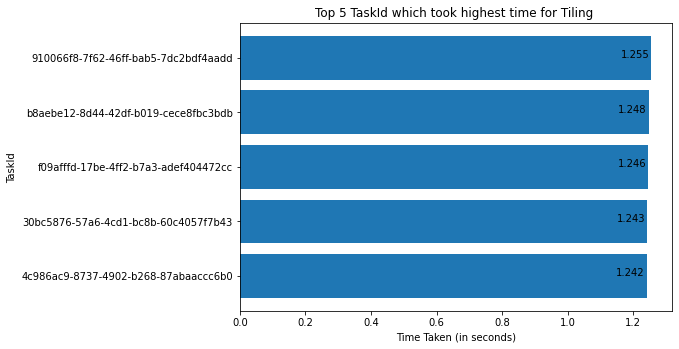

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =q_1_2.head()["taskId"]
students =q_1_2.head()["delta_dttm"].dt.total_seconds()
ax.barh(langs,students)
plt.xlabel("Time Taken (in seconds)")
plt.ylabel("TaskId")
plt.title("Top 5 TaskId which took highest time for Tiling ")
ax.invert_yaxis()
for i in range(1,6):
   plt.text(-0.05+q_1_2.head()["delta_dttm"].dt.total_seconds().iloc[i-1],i-1,round(q_1_2.head()["delta_dttm"].dt.total_seconds().iloc[i-1],3), ha="center",rotation="horizontal")
plt.show()

Top 5 TaskId which took most Time for 'Uploading'

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Uploading" eventname from (select distinct dttm,taskId,jobId from application_checkpoint where eventName='Uploading' and eventType='START') a join 
(select distinct dttm,taskId,jobId from application_checkpoint where eventName='Uploading' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
q_1_3=pysqldf(q)
q_1_3["start_dttm"]=q_1_3["start_dttm"].astype('datetime64')
q_1_3["end_dttm"]=q_1_3["end_dttm"].astype('datetime64')
q_1_3['delta_dttm']=q_1_3['end_dttm']-q_1_3['start_dttm']
# arranging in descending order
q_1_3=q_1_3.sort_values(by='delta_dttm', ascending=False)
q_1_3.head()

,start_dttm,end_dttm,taskId,jobId,eventname,delta_dttm
1566,2018-11-08 07:43:00.730,2018-11-08 07:43:44.248,83064f91-5a19-4526-8673-38ab28dd3ab7,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Uploading,0 days 00:00:43.518000
1622,2018-11-08 07:43:01.377,2018-11-08 07:43:44.677,b545abf2-a9c4-414d-807d-a9ea1357ef3e,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,0 days 00:00:43.300000
1598,2018-11-08 07:43:01.162,2018-11-08 07:43:44.347,04cf0a46-41b7-4970-bd4f-84968b151ed4,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Uploading,0 days 00:00:43.185000
1636,2018-11-08 07:43:01.451,2018-11-08 07:43:44.604,4884f026-a329-4d14-9342-f8871d20fbad,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,0 days 00:00:43.153000
1593,2018-11-08 07:43:01.150,2018-11-08 07:43:44.290,ef15022d-f816-4434-b41e-709cb996bc08,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Uploading,0 days 00:00:43.140000


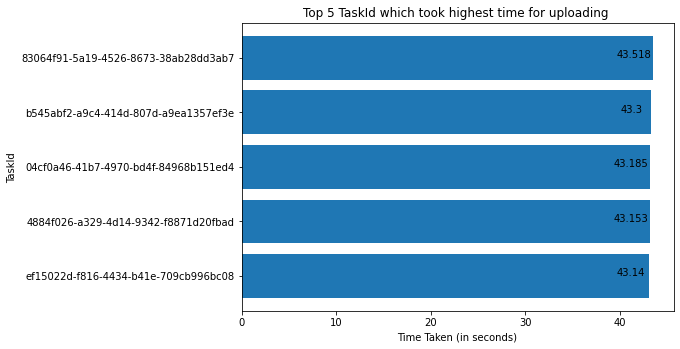

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =q_1_3.head()["taskId"]
students =q_1_3.head()["delta_dttm"].dt.total_seconds()
ax.barh(langs,students)
plt.xlabel("Time Taken (in seconds)")
plt.ylabel("TaskId")
plt.title("Top 5 TaskId which took highest time for uploading ")
ax.invert_yaxis()
for i in range(1,6):
   plt.text(-2+q_1_3.head()["delta_dttm"].dt.total_seconds().iloc[i-1],i-1,round(q_1_3.head()["delta_dttm"].dt.total_seconds().iloc[i-1],3), ha="center",rotation="horizontal")
plt.show()

Top 5 TaskId which took most Time for 'Rendering'

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Render" as eventname from (select distinct dttm,taskId,jobId from application_checkpoint where eventName='Render' and eventType='START') a join 
(select distinct dttm,taskId,jobId from application_checkpoint where eventName='Render' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
q_1=pysqldf(q)
q_1["start_dttm"]=q_1["start_dttm"].astype('datetime64')
q_1["end_dttm"]=q_1["end_dttm"].astype('datetime64')
q_1['delta_dttm']=q_1['end_dttm']-q_1['start_dttm']
# arranging in descending order
q_1=q_1.sort_values(by='delta_dttm', ascending=False)
q_1.head()

,start_dttm,end_dttm,taskId,jobId,eventname,delta_dttm
34739,2018-11-08 08:06:34.098,2018-11-08 08:07:55.606,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,0 days 00:01:21.508000
13324,2018-11-08 07:50:57.638,2018-11-08 07:52:17.799,25b410b5-f5ef-4a2f-8b21-29175bca35fc,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,0 days 00:01:20.161000
47084,2018-11-08 08:15:39.327,2018-11-08 08:16:56.916,d194b27d-d421-47d3-ae41-eed07a00e8d4,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,0 days 00:01:17.589000
52068,2018-11-08 08:19:18.949,2018-11-08 08:20:34.065,f4a61a45-2e92-4aa0-9219-4425ce0ec17e,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,0 days 00:01:15.116000
6062,2018-11-08 07:45:41.852,2018-11-08 07:46:55.870,94bfb9b3-80c2-44e7-8869-c29a0007bbe0,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,0 days 00:01:14.018000


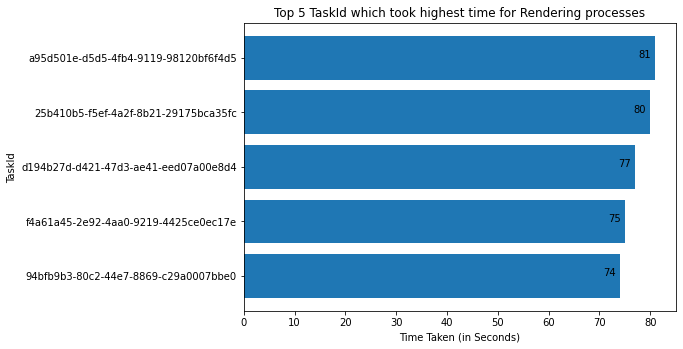

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =q_1.head()["taskId"]
students = q_1.head()["delta_dttm"].dt.total_seconds().astype(int)
ax.barh(langs,students)
plt.xlabel("Time Taken (in Seconds)")
plt.ylabel("TaskId")
ax.invert_yaxis()
plt.title("Top 5 TaskId which took highest time for Rendering processes")
for i in range(1,6):
   plt.text(-2+q_1.head()["delta_dttm"].dt.total_seconds().astype(int).iloc[i-1],i-1 ,q_1.head()["delta_dttm"].dt.total_seconds().astype(int).iloc[i-1], ha="center",rotation="horizontal")
plt.show()

Top 5 TaskId which took most Time for 'Total Rendering'

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Total Render" eventname,a.hostname hostname from (select distinct dttm,taskId,jobId,hostname from application_checkpoint where eventName='TotalRender' and eventType='START') a join 
(select distinct dttm,taskId,jobId from application_checkpoint where eventName='TotalRender' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
q_1_4=pysqldf(q)
q_1_4["start_dttm"]=q_1_4["start_dttm"].astype('datetime64')
q_1_4["end_dttm"]=q_1_4["end_dttm"].astype('datetime64')
q_1_4['delta_dttm']=q_1_4['end_dttm']-q_1_4['start_dttm']
# arranging in descending order
q_1_4=q_1_4.sort_values(by='delta_dttm', ascending=False)
q_1_4.head()

,start_dttm,end_dttm,taskId,jobId,eventname,hostname,delta_dttm
1372,2018-11-08 07:42:10.593,2018-11-08 07:43:44.290,ef15022d-f816-4434-b41e-709cb996bc08,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Total Render,0745914f4de046078517041d70b22fe7000015,0 days 00:01:33.697000
1462,2018-11-08 07:42:14.867,2018-11-08 07:43:44.392,76fb8e93-c3a6-456c-9661-3b7407800027,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Total Render,b9a1fa7ae2f74eb68f25f607980f97d700000O,0 days 00:01:29.525000
1475,2018-11-08 07:42:16.024,2018-11-08 07:43:44.248,83064f91-5a19-4526-8673-38ab28dd3ab7,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Total Render,265232c5f6814768aeefa66a7bec6ff6000000,0 days 00:01:28.224000
34739,2018-11-08 08:06:34.096,2018-11-08 08:07:56.607,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Total Render,0d56a730076643d585f77e00d2d8521a00000I,0 days 00:01:22.511000
13324,2018-11-08 07:50:57.636,2018-11-08 07:52:18.946,25b410b5-f5ef-4a2f-8b21-29175bca35fc,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Total Render,4a79b6d2616049edbf06c6aa58ab426a000003,0 days 00:01:21.310000


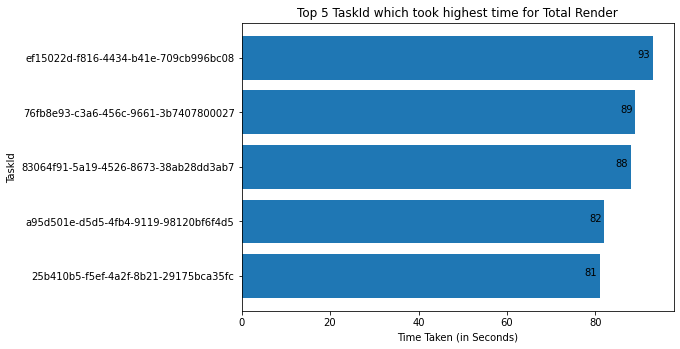

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs =q_1_4.head()["taskId"]
students = q_1_4.head()["delta_dttm"].dt.total_seconds().astype(int)
ax.barh(langs,students)
plt.xlabel("Time Taken (in Seconds)")
plt.ylabel("TaskId")
ax.invert_yaxis()
plt.title("Top 5 TaskId which took highest time for Total Render")
for i in range(1,6):
   plt.text(-2+q_1_4.head()["delta_dttm"].dt.total_seconds().astype(int).iloc[i-1],i-1 ,q_1_4.head()["delta_dttm"].dt.total_seconds().astype(int).iloc[i-1], ha="center",rotation="horizontal")
plt.show()

In [ ]:
m=pd.DataFrame()

m=m.append(q_1.tail(1))
m=m.append(q_1.head(1))

m=m.append(q_1_1.tail(1))
m=m.append(q_1_1.head(1))

m=m.append(q_1_2.tail(1))
m=m.append(q_1_2.head(1))

m=m.append(q_1_3.tail(1))
m=m.append(q_1_3.head(1))

m=m.append(q_1_4.iloc[:,[0,1,2,3,4,6]].tail(1))
m=m.append(q_1_4.iloc[:,[0,1,2,3,4,6]].head(1))
m["delta_dttm"]=m["delta_dttm"].dt.total_seconds().astype(float)
m

,start_dttm,end_dttm,taskId,jobId,eventname,delta_dttm
63401,2018-11-08 08:27:36.636,2018-11-08 08:27:59.215,0849dfbf-51a2-43d3-b0e4-bfa11f830010,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,22.579
34739,2018-11-08 08:06:34.098,2018-11-08 08:07:55.606,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Render,81.508
65792,2018-11-08 08:29:23.158,2018-11-08 08:29:23.160,5140e07a-71fb-4b6c-ad80-c0695b5a626e,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0.002
46417,2018-11-08 08:15:09.191,2018-11-08 08:15:09.651,59ac7676-f371-4eee-aa67-5f7c7daf40dc,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Saving config,0.460
1656,2018-11-08 07:43:01.595,2018-11-08 07:43:02.280,02029980-be9c-401f-b7ff-2313fa2a495b,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,0.685
39393,2018-11-08 08:10:42.124,2018-11-08 08:10:43.379,910066f8-7f62-46ff-bab5-7dc2bdf4aadd,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Tiling,1.255
14843,2018-11-08 07:52:42.790,2018-11-08 07:52:43.512,37ebe851-9042-49e3-9e81-6443603a98ab,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Uploading,0.722
1566,2018-11-08 07:43:00.730,2018-11-08 07:43:44.248,83064f91-5a19-4526-8673-38ab28dd3ab7,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Uploading,43.518
5322,2018-11-08 07:45:08.580,2018-11-08 07:45:31.951,bb205a5e-251e-4349-b8b0-3402a57e357e,1024-lvl12-7e026be3-5fd0-48ee-b7d1-abd61f747705,Total Render,23.371
1372,2018-11-08 07:42:10.593,2018-11-08 07:43:44.290,ef15022d-f816-4434-b41e-709cb996bc08,1024-lvl8-5ad819e1-fbf2-42e0-8f16-a3baca825a63,Total Render,93.697


In [ ]:
q="""select a.taskId taskId,eventname,x,y,level,delta_dttm from m a join task_x_y b on a.taskId=b.taskId;"""
m_join_taskxy=pysqldf(q)
m_join_taskxy

,taskId,eventname,x,y,level,delta_dttm
0,0849dfbf-51a2-43d3-b0e4-bfa11f830010,Render,30,21,12,22.579
1,a95d501e-d5d5-4fb4-9119-98120bf6f4d5,Render,91,105,12,81.508
2,5140e07a-71fb-4b6c-ad80-c0695b5a626e,Saving config,13,14,12,0.002
3,59ac7676-f371-4eee-aa67-5f7c7daf40dc,Saving config,174,41,12,0.460
4,02029980-be9c-401f-b7ff-2313fa2a495b,Tiling,41,0,12,0.685
5,910066f8-7f62-46ff-bab5-7dc2bdf4aadd,Tiling,166,89,12,1.255
6,37ebe851-9042-49e3-9e81-6443603a98ab,Uploading,20,31,12,0.722
7,83064f91-5a19-4526-8673-38ab28dd3ab7,Uploading,14,1,8,43.518
8,bb205a5e-251e-4349-b8b0-3402a57e357e,Total Render,2,32,12,23.371
9,ef15022d-f816-4434-b41e-709cb996bc08,Total Render,3,7,8,93.697


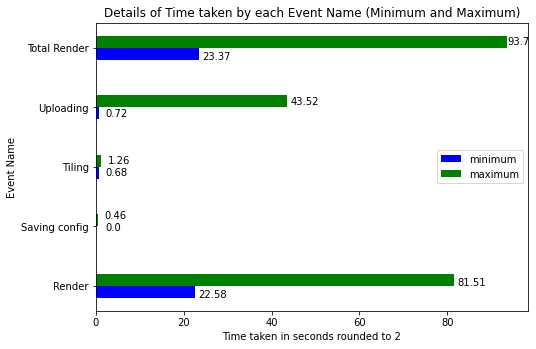

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
la=["Render","Saving config","Tiling","Uploading","Total Render"]
m_m=["minimum","maximum"]
co=["blue","green"]
al=["center","edge"]
n=[]
f=[0.4,0.2]
t=1
j=0
for i in range(0,len(m)):
  if(i%2==0):
    t=0
    j+=1
  n.append(ax.barh(la[j-1],m.iloc[i,5],f[t],align=al[t],label=m_m[t],color=co[t]))
  i+=1
  t=1
plt.ylabel("Event Name")
plt.xlabel("Time taken in seconds rounded to 2")
plt.title("Details of Time taken by each Event Name (Minimum and Maximum)")
ax.legend(handles=[n[0],n[1]])
m["delta_dttm"]=round(m.delta_dttm,2)
plt.text(4+m.iloc[0,5],-0.2,m.iloc[0,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[1,5],-0.2+0.2,m.iloc[1,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[2,5],0.925,m.iloc[2,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[3,5],0.925+0.2,m.iloc[3,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[4,5],1.85,m.iloc[4,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[5,5],1.85+0.2,m.iloc[5,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[6,5],2.85,m.iloc[6,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[7,5],2.85+0.2,m.iloc[7,5], ha="center",rotation="horizontal")
plt.text(4+m.iloc[8,5],3.8,m.iloc[8,5], ha="center",rotation="horizontal")
plt.text(2.5+m.iloc[9,5],3.85+0.2,m.iloc[9,5], ha="center",rotation="horizontal")
plt.show()

In [ ]:
q_1_4["end_dttm"].max()-q_1_4["start_dttm"].min()

Timedelta('0 days 00:48:45.388000')

**Comments**: The task Id ef15022d-f816-4434-b41e-709cb996bc08 took the highest time (93.7 seconds) for Total Rendering of the image coordinates (x, y) = (3,7) under level 8 and the task Id bb205a5e-251e-4349-b8b0-3402a57e357e took the lowest time (23.57 seconds) for Total Rendering the image coordinates (x, y) = (2,32) under level 12. 
Task d 83064f91-5a19-4526-8673-38ab28dd3ab7 took the highest time (43.52 seconds) for Uploading the image coordinates (x, y) = (14,1) under level 8 and the task Id 37ebe851-9042-49e3-9e81-6443603a98ab took the lowest time (0.72 seconds) for Uploading the image coordinates (x, y) = (20,31) under level 12.  
The task Id 910066f8-7f62-46ff-bab5-7dc2bdf4aadd took the highest time (1.26 seconds) for Tiling the image coordinates (x, y) = (166,89) under level 12 and task Id 02029980-be9c-401f-b7ff-2313fa2a495b took the lowest time (0.68 seconds) for Tiling the image coordinates (x, y) =(41,0) under level 12.  
The task Id 59ac7676-f371-4eee-aa67-5f7c7daf40dc took the highest time (0.46 seconds) for Saving configuration of the image coordinates (x, y) = (174, 41) under level 12 and task Id 5140e07a-71fb-4b6c-ad80-c0695b5a626e took the lowest time (0.002 seconds) for Saving configuration the image coordinates (x, y) = (13,14) under level 12.  

The task Id a95d501e-d5d5-4fb4-9119-98120bf6f4d5 took the highest time (81.51 seconds) for Rendering the image coordinates (x, y) = (91,105) under level 12 and task Id 0849dfbf-51a2-43d3-b0e4-bfa11f830010 took the lowest time (22.58 seconds) for Rendering the image coordinates (x, y) = (30,21) under level 12.  
Most importantly the total time taken for Total rendering the image is 48 Minutes and 45 Seconds.  


#### 2.	 *Which Event Name consumes more run time?*

In [ ]:
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,a.eventName eventName,a.hostname hostname from (select distinct dttm,taskId,jobId,eventName,hostname from application_checkpoint where eventType='START') a join 
(select distinct dttm,taskId,jobId,eventName,hostname from application_checkpoint where eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId and a.eventName=b.eventName and a.hostname=b.hostname;"""
p_1=pysqldf(q)
p_1["start_dttm"]=p_1["start_dttm"].astype('datetime64')
p_1["end_dttm"]=p_1["end_dttm"].astype('datetime64')
p_1['delta_dttm']=p_1['end_dttm']-p_1['start_dttm']
p_1=p_1.sort_values(by='delta_dttm', ascending=False)
p_1_1=p_1
p_1_1["delta_dttm"]=p_1_1["delta_dttm"].astype("string")
p_1_1["delta_dttm"] = pd.to_timedelta(p_1_1["delta_dttm"])
p_1_1['delta_dttm'] = p_1_1['delta_dttm'].dt.total_seconds().astype(int)

In [ ]:
q ="""select eventName,avg(delta_dttm) avg_timedelta from p_1_1 group by 1 ;"""
h_1=pysqldf(q)
h_1=h_1.sort_values(by='avg_timedelta', ascending=False)
h_1

,eventName,avg_timedelta
3,TotalRender,42.107002
0,Render,40.710987
4,Uploading,1.024364
2,Tiling,0.415090
1,Saving Config,0.000000


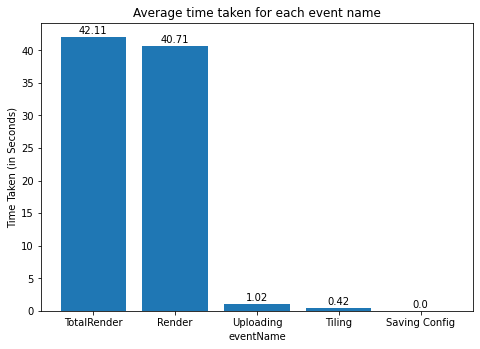

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
label =h_1["eventName"]
val = h_1["avg_timedelta"]
ax.bar(label,val)
plt.ylabel("Time Taken (in Seconds)")
plt.xlabel("eventName")
#ax.invert_yaxis()
plt.title("Average time taken for each event name")
for i in range(1,6):
   plt.text(i-1,0.5+h_1["avg_timedelta"].iloc[i-1] ,round(h_1["avg_timedelta"].iloc[i-1],2), ha="center",rotation="horizontal")
plt.show()

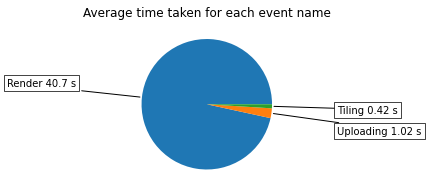

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels = ["Render 40.7 s","Uploading 1.02 s","Tiling 0.42 s"]

data = [40.71,1.02,0.42]

wedges, texts = ax.pie(data)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(2*np.sign(x), 3*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Average time taken for each event name")

plt.show()

*Comments*: The above bar plot shows that Rendering consumes more run time whereas saving config process consumed the least run time. Total Render will always consume more time as it is the sum that includes all four processes.

#### 3.	*Is there any relationship between the variables in the GPU table? If so, how are they related?*  

For answering this question, the averages of the numerical variables are used after grouping based on hostName.

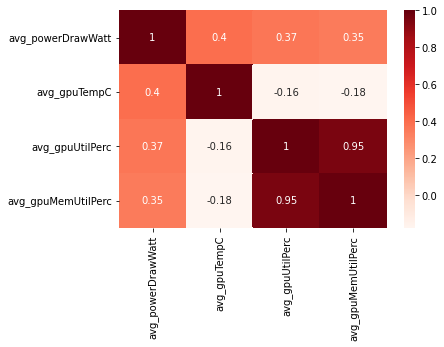

In [ ]:
import seaborn as sns
q ="""select hostname,avg(powerDrawWatt) avg_powerDrawWatt,avg(gpuTempC) avg_gpuTempC,avg(gpuUtilPerc) avg_gpuUtilPerc,avg(gpuMemUtilPerc) avg_gpuMemUtilPerc from gpu group by 1;"""
mean_gpu=pysqldf(q)
sns.heatmap(mean_gpu.iloc[:,1:].corr(), cmap = 'Reds',annot=True)
plt.show()

**Comments**: The heat plot shows there is a strong relationship between the average GPU utilization percentage and average memory utilization percentage. There are no other significant relationships that can be identified from the heat plot.

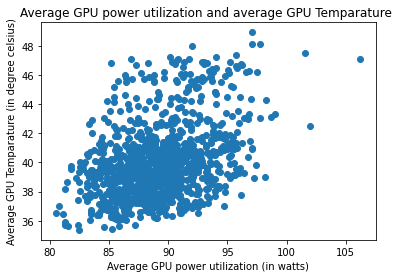

In [ ]:
plt.scatter(mean_gpu.iloc[:,1], mean_gpu.iloc[:,2])
plt.title("Average GPU power utilization and average GPU Temparature ")
plt.xlabel('Average GPU power utilization (in watts)')
plt.ylabel('Average GPU Temparature (in degree celsius)')
plt.show()

**Comments**: The above figure shows that there is a slight increase in temperature as the power consumption increases.

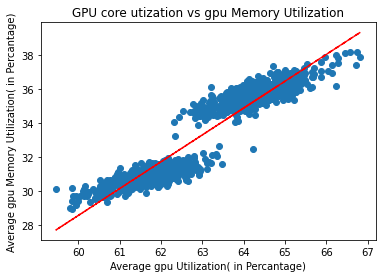

In [ ]:
plt.scatter(mean_gpu.iloc[:,3], mean_gpu.iloc[:,4])
plt.title('GPU core utization vs gpu Memory Utilization')
plt.xlabel('Average gpu Utilization( in Percantage)')
plt.ylabel('Average gpu Memory Utilization( in Percantage)')
z = np.polyfit(mean_gpu.avg_gpuUtilPerc, mean_gpu.avg_gpuMemUtilPerc, 1)

p = np.poly1d(z)

plt.plot(mean_gpu.avg_gpuUtilPerc,p(mean_gpu.avg_gpuUtilPerc),"r--")
plt.show()

**Comments**: The scatter plot shows that as the core utilization increases memory utilization also increases.

#### 4.	*Can any particular statistical model be fitted to any variables related to GPU performance matrix? If so, describe the model.*

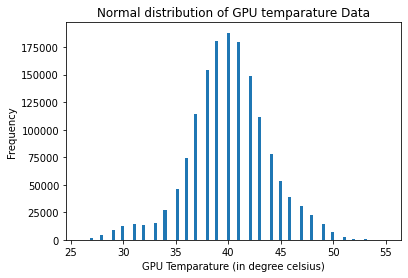

In [ ]:
plt.hist(gpu['gpuTempC'], bins=100)
plt.title('Normal distribution of GPU temparature Data')
plt.xlabel('GPU Temparature (in degree celsius)')
plt.ylabel('Frequency')
plt.show()


**Comments**: The Histogram reveals that the temperature is distributed normally in the data. The mean temperature is 40 degrees Celsius and Standard Deviation is 3.8.

#### 5.	*What are the host names which consumed maximum and minimum time for the rendering process?*

In [ ]:
q_1_4["delta_dttm"]=q_1_4["delta_dttm"].dt.total_seconds().astype(float)
q="""select hostname,avg(delta_dttm) Time from q_1_4 group by 1;"""
host_5_time=pysqldf(q)
host_5_time_mx=host_5_time.copy().sort_values(by="Time",ascending=0).head(3)
host_5_time_mn=host_5_time.copy().sort_values(by="Time",ascending=0).tail(3)

Top 3 hostname which took least time for rendering process

In [ ]:
host_5_time_mn

,hostname,Time
273,35bd84d72aca403b8129a7d652cc275000000N,38.824471
182,265232c5f6814768aeefa66a7bec6ff600000W,38.667857
587,8b6a0eebc87b4cb2b0539e81075191b900000D,38.627915


Top 3 hostname which took maximum time for rendering process

In [ ]:
host_5_time_mx

,hostname,Time
952,dcc19f48bb3445a28338db3a8f002e9c00000S,47.038776
147,0d56a730076643d585f77e00d2d8521a00001B,47.013441
987,e7adc42d28814e518e9601ac2329c51300000D,46.993169


**Comments**: The hostname 8b6a0eebc87b4cb2b0539e81075191b900000D took minimum time to render the image whereas the hostname dcc19f48bb3445a28338db3a8f002e9c00000S took maximum rendering time. Based on the assumption, it can be seen that the hostnames which took lowest time for rendering is the one which performed well.

#### 6.	*What are the maximum and minimum values of computational resource used, temperature and power consumption of the GPU and identify the corresponding virtual machines (hostname)?*

In [ ]:
q ="""select hostname,avg(powerDrawWatt) avg_powerDrawWatt,avg(gpuTempC) avg_gpuTempC,avg(gpuUtilPerc) avg_gpuUtilPerc,avg(gpuMemUtilPerc) avg_gpuMemUtilPerc from gpu group by 1;"""
h=pysqldf(q)
h_p=pd.concat([h.sort_values(by="avg_powerDrawWatt").head(1),h.sort_values(by="avg_powerDrawWatt").tail(1)]) # 1st 2 rows shows max and min data by power use
h_p=h_p.append(pd.concat([h.sort_values(by="avg_gpuTempC").head(1),h.sort_values(by="avg_gpuTempC").tail(1)]))#
h_p=h_p.append(pd.concat([h.sort_values(by="avg_gpuUtilPerc").head(1),h.sort_values(by="avg_gpuUtilPerc").tail(1)]))
h_p=h_p.append(pd.concat([h.sort_values(by="avg_gpuMemUtilPerc").head(1),h.sort_values(by="avg_gpuMemUtilPerc").tail(1)]))
h_p

,hostname,avg_powerDrawWatt,avg_gpuTempC,avg_gpuUtilPerc,avg_gpuMemUtilPerc
126,0d56a730076643d585f77e00d2d8521a00000Q,80.510313,36.533644,61.221852,30.011992
687,a77ef58b13ad4c01b769dac8409af3f800000D,106.247462,47.088608,66.451033,38.159227
772,b9a1fa7ae2f74eb68f25f607980f97d700001C,82.447675,35.371752,60.662891,30.119254
791,cd44f5819eba427a816e7ce648adceb200000H,97.116562,48.926716,64.073951,35.473684
855,d8241877cd994572b46c861e5d144c8500000V,91.070781,46.062750,59.464619,30.147530
729,b9a1fa7ae2f74eb68f25f607980f97d7000005,92.832931,45.551632,66.825450,37.894071
182,265232c5f6814768aeefa66a7bec6ff600000W,81.400200,38.646862,59.859813,28.954606
147,0d56a730076643d585f77e00d2d8521a00001B,94.302272,38.357761,66.564290,38.231179


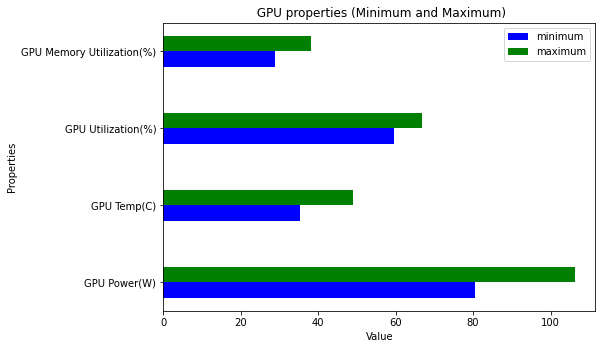

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
la=["GPU Power(W)","GPU Temp(C)","GPU Utilization(%)","GPU Memory Utilization(%)"]
m_m=["minimum","maximum"]
co=["blue","green"]
al=["center","edge"]
n=[]
f=[0.4,0.2]
j=0
t=1
for i in range(0,8):
  if(i%2==0):
    j+=1
    t=0
  n.append(ax.barh(la[j-1],h_p.iloc[i,j],f[t],align=al[t],label=m_m[t],color=co[t]))
  i+=1
  t=1
plt.ylabel("Properties")
plt.xlabel("Value")
plt.title(" GPU properties (Minimum and Maximum)")
ax.legend(handles=[n[0],n[1]])
plt.show()

**Comments**: The above-shown table as well as the figure together shows the details of virtual machines which use maximum as well as minimum computational resources and physical properties of GPU.

#### 7.	Which virtual machine processed most image rendering tasks?  explain this with the help of a histogram.

In [ ]:
# histogram of hostname

q="""select hostname,count(*) cnt from p_1 where eventname="TotalRender" group by 1;"""
f=pysqldf(q)
f=f.sort_values(by ="cnt")


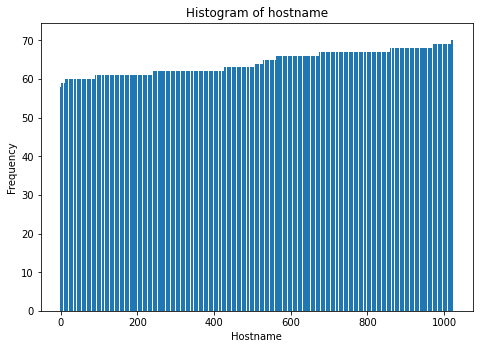

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = list(range(0, 1024))
students = f.cnt
ax.bar(langs,students)
plt.ylabel("Frequency")
plt.xlabel("Hostname")
plt.title("Histogram of hostname")
plt.show()

In [ ]:
print("max= ",f.max(),"min= ",f.min(),"mean=",f.mean(),"standard)deviation=",f.std())

max=  hostname    e7adc42d28814e518e9601ac2329c51300001D
cnt                                             71
dtype: object min=  hostname    04dc4e9647154250beeee51b866b0715000000
cnt                                             58
dtype: object mean= cnt    64.250977
dtype: float64 standard)deviation= cnt    2.972421
dtype: float64


<ipython-input-75-689eb9b01d5f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("max= ",f.max(),"min= ",f.min(),"mean=",f.mean(),"standard)deviation=",f.std())


In [ ]:
f[f["cnt"]==f.cnt.min()] # hostname having min count

,hostname,cnt
952,dcc19f48bb3445a28338db3a8f002e9c00000S,58


In [ ]:
f[f["cnt"]==f.cnt.max()] # hostname having max count

,hostname,cnt
587,8b6a0eebc87b4cb2b0539e81075191b900000D,71


In [ ]:
f.cnt.mean() # average of  count

64.2509765625

**Comments**: The histogram shows that a minimum of 58 image coordinates were processed by each virtual machine and the maximum image processing was done by the hostname with Id 8b6a0eebc87b4cb2b0539e81075191b900000D which is 71 image coordinates. The average number of task Id is 64.25 for one hostname with a standard deviation of 2.97.

 #### 8.	 *How many image coordinates are associated with each level?*

In [ ]:
q="""select level,count(*) cnt from task_x_y group by 1 ;"""
lvl=pysqldf(q)
lvl

,level,cnt
0,4,1
1,8,256
2,12,65536


**Comments**: The highest count is for level 12 which is 65536 and the level with the lowest count is 1 for level 4.

#### 9.	*How are the tiles of the image and total rendering times related?*

In [ ]:
q_1_4["delta_dttm"]=q_1_4["delta_dttm"].dt.total_seconds().astype(float)

In [ ]:
q="""select x,y,max(delta_dttm) delta_dttm from task_x_y a join q_1_4 b on a.taskId =b.taskId group by 1,2;"""
d_plot=pysqldf(q)
d_plot.sort_values(by="delta_dttm")


,x,y,delta_dttm
544,2,32,23.371
6921,27,9,23.380
8971,35,11,23.418
2838,11,22,23.429
7701,30,21,23.434
...,...,...,...
23658,92,106,81.310
23401,91,105,82.511
3585,14,1,88.224
17926,70,6,89.525


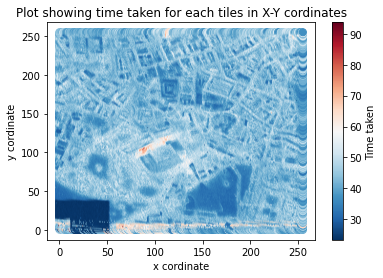

In [ ]:
d_plot=d_plot.rename(columns={"delta_dttm":"Time taken"})
ax=d_plot.plot.scatter(x="x", y="y", c="Time taken", s=50,sharex=False,cmap="RdBu_r")
ax.set_xlabel("x cordinate")
ax.set_ylabel("y cordinate")
ax.set_title("Plot showing time taken for each tiles in X-Y cordinates")
plt.show()

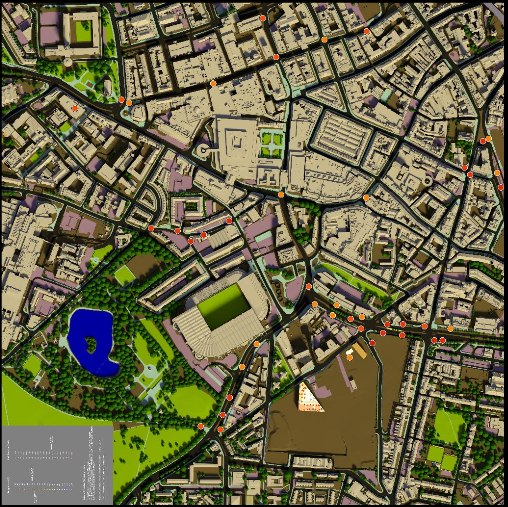

**Comments**:
Figure 10 shows the plot generated using the data from the data set Application-check points and Task-x-y.  Here, x and y coordinates are the corresponding x and y coordinates from the dataset and colour represent the time taken for the total rendering process of each tile. Subsequently, the scatter plot shows some similarities with the original image which concludes that the tile time taken for processing depends on the tile/pixel values of the original image. The dark-shaded region indicates that the process took a long time to execute for the particular tiles.


#### 10.	*Explain the GPU properties using suitable graphs on the basis of hostnames and Task Id?*

In [ ]:
#converting timestamp to seconds for the tables application checkpoints and GPU
new_tf_1=application_checkpoint.copy()
new_tf_2=gpu.copy()
new_tf_1=new_tf_1.sort_values(by="dttm")
new_tf_2=new_tf_2.sort_values(by="dttm")
q ="""select a.dttm as start_dttm,b.dttm as end_dttm,a.taskId taskId,a.jobId jobId,"Total Render" eventname,a.hostname hostname from (select distinct dttm,taskId,jobId,hostname from new_tf_1 where eventName='TotalRender' and eventType='START') a join 
(select distinct dttm,taskId,jobId,hostname from new_tf_1 where eventName='TotalRender' and eventType='STOP') b on a.jobId=b.jobId and a.taskId=b.taskId ;"""
new_tf_1=pysqldf(q)
new_tf_1["start_dttm"]=new_tf_1["start_dttm"].astype('datetime64')
new_tf_1["end_dttm"]=new_tf_1["end_dttm"].astype('datetime64')



Joining all thes 3 tables 

In [ ]:
q =""" select a.start_dttm start_dttm,a.end_dttm end_dttm,b.dttm dttm,a.taskId taskId,a.jobId jobId,a.eventname eventname,a.hostname hostname,c.x x,c.y y,c.level level,gpuSerial,gpuUUID,powerDrawWatt,
gpuTempC,gpuUtilPerc,gpuMemUtilPerc from new_tf_1 a join new_tf_2 b on a.hostname=b.hostname and b.dttm<=a.end_dttm and b.dttm>=a.start_dttm join task_x_y c on a.taskId=c.taskId;"""
a_c_g_join=pysqldf(q)

In [ ]:
q =""" select hostname,taskId,avg(powerDrawWatt) powerDrawWatt,avg(gpuTempC) gpuTempC,avg(gpuUtilPerc) gpuUtilPerc,avg(gpuMemUtilPerc) gpuMemUtilPerc from
a_c_g_join group by 1,2;"""
m_m_m=pysqldf(q)

In [ ]:
#the table showing maximum and minimum of GPU properties by hostname and task Id
u=[]
u=pd.concat([m_m_m.sort_values(by="powerDrawWatt").head(1),m_m_m.sort_values(by="powerDrawWatt").tail(1)])
u=u.append(pd.concat([m_m_m.sort_values(by="gpuTempC").head(1),m_m_m.sort_values(by="gpuTempC").tail(1)]))
u=u.append(pd.concat([m_m_m.sort_values(by="gpuUtilPerc").head(1),m_m_m.sort_values(by="gpuUtilPerc").tail(1)]))
u=u.append(pd.concat([m_m_m.sort_values(by="gpuMemUtilPerc").head(1),m_m_m.sort_values(by="gpuMemUtilPerc").tail(1)]))
u

,hostname,taskId,powerDrawWatt,gpuTempC,gpuUtilPerc,gpuMemUtilPerc
2043,04dc4e9647154250beeee51b866b071500000V,e4c83dfd-c1c2-4805-a8cb-6cf64b01904c,36.941250,31.781250,20.312500,8.031250
13277,2ecb9d8d51bc457aac88073f6da05461000005,26c9de8f-d54d-4bda-b02e-f17d38dbbda3,144.278571,46.107143,77.000000,38.285714
31305,6139a35676de44d6b61ec247f0ed865700000F,2744c60b-abea-47fe-a0eb-0be3d1fd4b5b,47.684286,29.571429,27.714286,11.333333
50799,cd44f5819eba427a816e7ce648adceb200000H,f32bc56e-118e-4f9a-8fd9-49b0ecca2525,118.071154,52.423077,75.692308,47.500000
56994,db871cd77a544e13bc791a64a0c8ed5000000C,54f9f5e7-b737-49f3-8221-787a2b8145ad,41.655152,34.757576,17.121212,6.878788
17954,4a79b6d2616049edbf06c6aa58ab426a000003,25b410b5-f5ef-4a2f-8b21-29175bca35fc,96.211750,39.375000,87.025000,34.825000
14574,2ecb9d8d51bc457aac88073f6da0546100000P,14ed2dea-1470-4455-9267-592e06e58a23,39.501875,36.750000,19.375000,6.718750
25920,4c72fae95b9147189a0559269a6953ff00000T,4f13081c-5c45-43d0-b744-05caaf5377e2,125.296538,39.192308,78.730769,53.076923


 corresponding x-y cordinates of the task Ids of the records in last table 

In [ ]:
q="""select x,y,a.taskid taskid from u a join task_x_y b on a.taskid=b.taskid;"""
xy=pysqldf(q)
xy

,x,y,taskid
0,51,3,e4c83dfd-c1c2-4805-a8cb-6cf64b01904c
1,113,111,26c9de8f-d54d-4bda-b02e-f17d38dbbda3
2,26,7,2744c60b-abea-47fe-a0eb-0be3d1fd4b5b
3,207,152,f32bc56e-118e-4f9a-8fd9-49b0ecca2525
4,51,0,54f9f5e7-b737-49f3-8221-787a2b8145ad
5,92,106,25b410b5-f5ef-4a2f-8b21-29175bca35fc
6,22,6,14ed2dea-1470-4455-9267-592e06e58a23
7,238,208,4f13081c-5c45-43d0-b744-05caaf5377e2


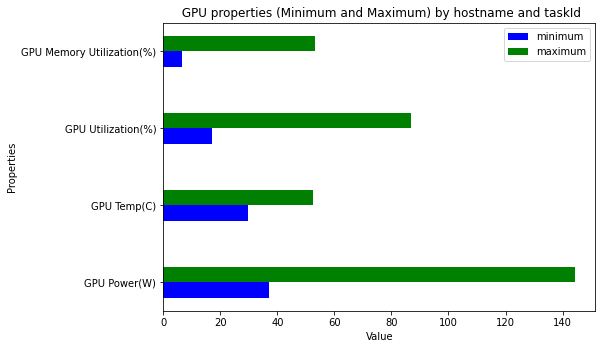

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
la=["GPU Power(W)","GPU Temp(C)","GPU Utilization(%)","GPU Memory Utilization(%)"]
m_m=["minimum","maximum"]
co=["blue","green"]
al=["center","edge"]
n=[]
f=[0.4,0.2]
j=0
t=1
for i in range(0,8):
  if(i%2==0):
    j+=1
    t=0
  n.append(ax.barh(la[j-1],u.iloc[i,j+1],f[t],align=al[t],label=m_m[t],color=co[t]))
  i+=1
  t=1
plt.ylabel("Properties")
plt.xlabel("Value")
plt.title(" GPU properties (Minimum and Maximum) by hostname and taskId")
ax.legend(handles=[n[0],n[1]])
plt.show()

**Comments**: 


*   The above Figure and the two tables show that the task Id 26c9de8f-d54d-4bda-b02e-f17d38dbbda3 (113,11) while running in the hostname 2ecb9d8d51bc457aac88073f6da05461000005 and the taskId e4c83dfd-c1c2-4805-a8cb-6cf64b01904c (51,3) executed under 04dc4e9647154250beeee51b866b071500000V consumed maximum and minimum power of 114.28 and 36.94 respectively.

*   52.42 and 29.57 were the extreme temperatures that were recorded for the host Names                                                                                                                                                                                cd44f5819eba427a816e7ce648adceb200000H and 6139a35676de44d6b61ec247f0ed865700000F while processing the ask Ids f32bc56e-118e-4f9a-8fd9-49b0ecca2525 and 2744c60b-abea-47fe-a0eb-0be3d1fd4b5b respectively.
*   TaskIds 54f9f5e7-b737-49f3-8221-787a2b8145ad(51,0) and 25b410b5-f5ef-4a2f-8b21-29175bca35fc (92,106) which executed under 4a79b6d2616049edbf06c6aa58ab426a000003 and db871cd77a544e13bc791a64a0c8ed5000000C respectively showed the GPU utilization percentage of 87.03 and 17.12 which is also the maximum and minimum utilization percentage


*   The maximum and minimum GPU memory were utilized by the task ids 4f13081c-5c45-43d0-b744-05caaf5377e2(238,208) and 14ed2dea-1470-4455-9267-592e06e58a23(22,6) while running in the host Names 4c72fae95b9147189a0559269a6953ff00000T and 2ecb9d8d51bc457aac88073f6da0546100000P respectively. They are 53.08 and 6.78.  
The below figure indicates the average of these four GPU parameters 



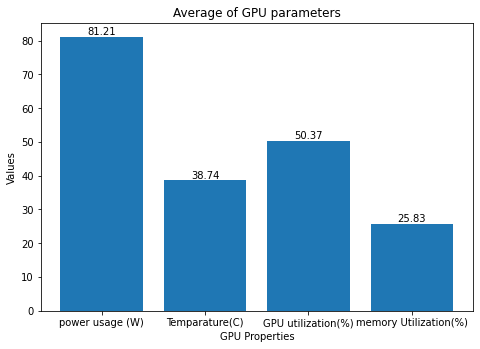

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels =["power usage (W)","Temparature(C)","GPU utilization(%)","memory Utilization(%)"]
values = [u.powerDrawWatt.mean(),u.gpuTempC.mean(),u.gpuUtilPerc.mean(),u.gpuMemUtilPerc.mean()]
ax.bar(labels,values)
plt.ylabel("Values")
plt.xlabel("GPU Properties")
#ax.invert_yaxis()
plt.title("Average of GPU parameters")
for i in range(0,4):
   plt.text(i,0.5+ values[i],round(values[i],2), ha="center",rotation="horizontal")
plt.show()

#### 11.	*How are the GPU properties related to the tile properties of the rendered image?*

In [ ]:
q =""" select taskId,x,y,avg(powerDrawWatt) powerDrawWatt,avg(gpuTempC) gpuTempC,avg(gpuUtilPerc) gpuUtilPerc,avg(gpuMemUtilPerc) gpuMemUtilPerc from
a_c_g_join group by 1,2,3;"""
x_y_gpu=pysqldf(q)

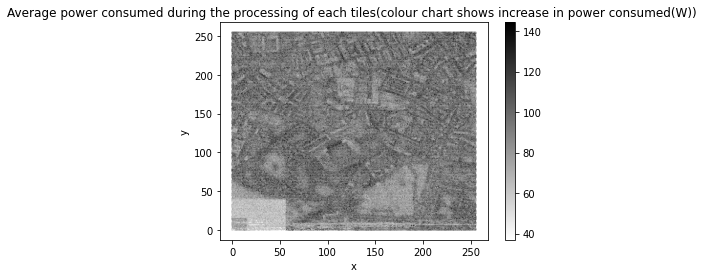

In [ ]:
x_y_gpu.plot.hexbin(x="x", y="y", C="powerDrawWatt", reduce_C_function=np.average,
                    title='Average power consumed during the processing of each tiles(colour chart shows increase in power consumed(W)) ',
                    gridsize=500,cmap='gist_yarg',sharex=False)

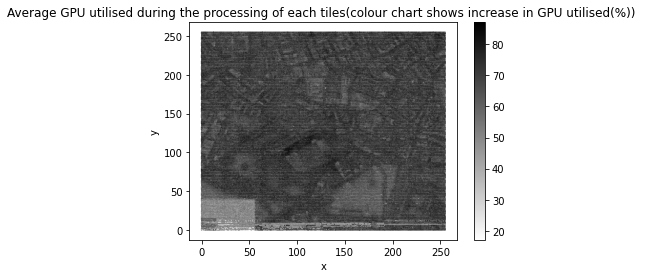

In [ ]:
x_y_gpu.plot.hexbin(x="x", y="y", C="gpuUtilPerc", reduce_C_function=np.average,
                    title='Average GPU utilised during the processing of each tiles(colour chart shows increase in GPU utilised(%)) ',
                    gridsize=500,cmap='gist_yarg',sharex=False)

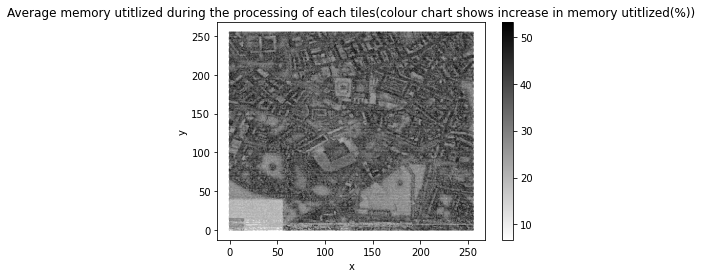

In [ ]:
x_y_gpu.plot.hexbin(x="x", y="y", C="gpuMemUtilPerc", reduce_C_function=np.average, gridsize=500,
                    title='Average memory utitlized during the processing of each tiles(colour chart shows increase in memory utitlized(%))',
                    xlabel='x',cmap='gist_yarg',sharex=False)

**comments**
The colour maps show that the tiles associated with the building and other structure took less power, GPU utilization and memory Utilization. This indicates that colur depth affect these properties. That is as colour depth increases, power, GPU utilization and memory Utilization also increases.

# 3.EVALUATION

The demand for scaling supercomputer resources can be assessed and confirmed by this EDA analysis. Furthermore, the thorough study offers some suggestions for further research and optimization of the cloud architecture.    
According to the analysis's findings, the rendering process took significantly longer than the other 3 stages. Additionally, there is a minimal correlation between the GPU's power consumption and temperature whereas the GPU utilisation and memory utilisation both exhibit a strong linear relationship.    
It's interesting to note that the measured temperature is normally distributed, with a mean and expected value of 40 degrees Celsius. In addition, the statistical analysis shows that the host names process an average of 62.41 task IDs. Additionally, the average GPU performance is 25.83% (GPU memory utilisation), 50.37% (GPU utilisation), 81.21 W (power consumption), and 38.74 C (temperature) (GPU temperature). Besides that, the scatter plot created by plotting GPU memory utilisation, Total Render time, GPU utilisation, and power consumption produced a similar representation of the image, indicating a strong correlation between the image's pixel/tile values and these properties in the XY plane, where x denotes the tile's x coordinate and y denotes the tile's y coordinate. In other words, the colour depth affects the rendering parameters. Lastly, It took around 48 minutes and 45 seconds to render the image completely.    
The outcome can be used to improve rendering performance and it guides our decision-making over whether to adopt a different cloud architecture or add more virtual machines. The exploratory data analysis aids in determining whether or not additional system resources are required.
In summary, by examining the data produced during the rendering process, this exploratory analysis offers helpful information that aids in the assessment of the supercomputer.

# 4.CONCLUSION
The main objective of the report is to analyse the performance of a cloud-based supercomputer which render a realistic tera-pixel image of the city of Newcastle upon Tyne. In addition, it provides interactive support for the city visualization to various stakeholders. Through this EDA analysis, the need for scaling supercomputer resources can be evaluated and verified. Moreover, the rigorous analysis provides some ideas about the areas of development and to perform optimization in the cloud architecture.  
The dataset for the analysis is generated while processing the image shown in figure 9. There are total
65793 tiles in which each tile is linked to a particular task Id. Each tile is associated with x coordinates and y coordinates values. There are mainly 4 tasks namely saving the configuration, Tiling, Rendering and uploading. The time at which these tasks start and stop are given in the application checkpoints table. The hostname is the virtual machine which processes these tasks. There is a total of 1024 virtual machines which render the full-size image. One hostname can execute many task Ids and the GPU properties of these hostnames while executing a particular task Id can be obtained from the GPU table.      
The results of the analysis show that the Rendering process took a significant amount of time compared to the other 3 processes. Also, there is slight relation between the GPU temperature and the power it consumed. At the same time, a strong linear relationship can be found between the GPU utilization and memory utilization. Interestingly, the temperature recorded is distributed normally with the mean and expected value of 40 degrees Celsius. Besides that, the statistical analysis indicates an average number of 62.41 task IDs is processed by the host names. Also, The mean GPU parameters are 25.83 % (GPU memory Utilization), 50.37 % GPU utilization, 81.21 W Power consumption, and 38.74 degree Celsius (GPU temperature). Moreover, the scatter plot obtained by plotting GPU memory utilization, Total Render time, GPU utilization and power consumption generated a similar representation of the image which implies that there is a strong relation between the pixel/ tile values of the image and these properties in the XY plane, where x denote tile x coordinate and y denote tile y coordinate. Lastly, It took around 48 minutes and 45 seconds to render the image completely.  
The result obtained can be used to optimize the rendering performance and it helps us to decide whether to choose different cloud architecture or to increase the number of virtual machines. The exploratory data analysis also helps to decide if more system resource is needed or not. 
In conclusion, this exploratory analysis provides useful information which helps in the evaluation of the supercomputer by analysing the data generated during the rendering process.  